In [22]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card/creditcard.csv


In [23]:
# loading the csv data to a Pandas DataFrame
credit_card = pd.read_csv('/kaggle/input/credit-card/creditcard.csv')
credit_card.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [25]:
credit_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [26]:
credit_card.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [27]:
credit_card.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

*Time: Nombre de secondes écoulées entre cette transaction et la première transaction dans le jeu de données.
*Amount: Montant de la transaction.
*Class: Indication de la classe de la transaction. Une valeur de 0 indique une transaction normale, tandis qu'une valeur de 1 indique une transaction frauduleuse.

In [28]:
credit_card['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [29]:
credit_card.duplicated().sum()

1081

In [30]:
# credit_card_c:: supprimer les doublons
credit_card_c=credit_card.drop_duplicates()

In [31]:
credit_card_c['Class'].value_counts()

Class
0    283253
1       473
Name: count, dtype: int64

dans cette data set après supprimer les doublons il y a 473 frauduleux.

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [33]:
# Diviser les données en features (X) et la variable cible (y)
X = credit_card.drop('Class', axis=1)
y = credit_card['Class']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("The length of the initial dataset is :", len(X))
print("The length of the train dataset is   :", len(X_train))
print("The length of the test dataset is    :", len(X_test))

The length of the initial dataset is : 284807
The length of the train dataset is   : 227845
The length of the test dataset is    : 56962


In [35]:
modelR = RandomForestClassifier()
modelR.fit(X_train, y_train)
modelR.score(X_train, y_train)
# And now we compare both scores :
print("\nScore for the Train dataset :", modelR.score(X_train, y_train))
print("Score for the Test dataset :", modelR.score(X_test, y_test))


Score for the Train dataset : 1.0
Score for the Test dataset : 0.9995786664794073


In [39]:
# Faire des prédictions sur l'ensemble de test
y_pred_R = modelR.predict(X_test)

In [45]:
print('Random Forest = ')
print(classification_report(y_test, y_pred_R))
print(confusion_matrix(y_test, y_pred_R))

Random Forest = 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.78      0.86        98

    accuracy                           1.00     56962
   macro avg       0.99      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962

[[56862     2]
 [   22    76]]


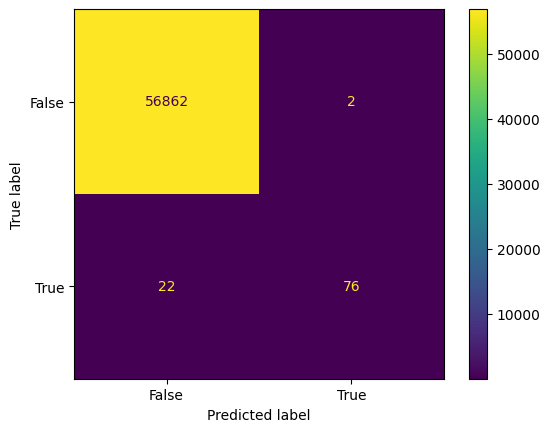

In [47]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

actual = y_test
predicted = modelR.predict(X_test)

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show() 

In [38]:
from sklearn.linear_model import LogisticRegression
modellR = LogisticRegression()
modellR.fit(X_train,y_train)
print("score d'exactitude(accuracy)LogisticRegression sur train :",modellR.score(X_train, y_train))
print("score d'exactitude(accuracy)LogisticRegression sur test :",modellR.score(X_test, y_test))

score d'exactitude(accuracy)LogisticRegression sur train : 0.9990475981478637
score d'exactitude(accuracy)LogisticRegression sur test : 0.9989817773252344


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [42]:
y_pred_RL = modellR.predict(X_test)

In [46]:
print('Logistic Regession = ')
print(classification_report(y_test, y_pred_RL))
print(confusion_matrix(y_test, y_pred_RL))

Logistic Regession = 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.71      0.69      0.70        98

    accuracy                           1.00     56962
   macro avg       0.85      0.85      0.85     56962
weighted avg       1.00      1.00      1.00     56962

[[56836    28]
 [   30    68]]


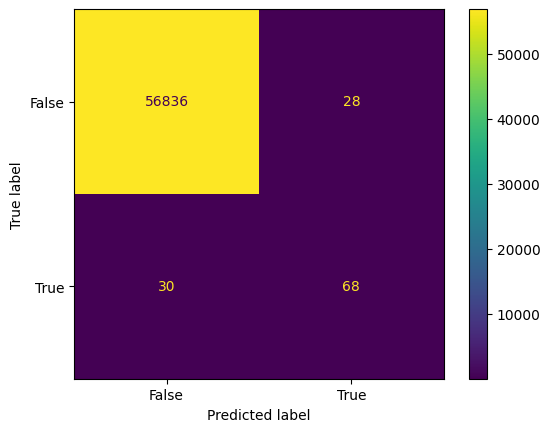

In [48]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

actual = y_test
predicted = modellR.predict(X_test)

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show() 

## les meilleurs model de prédiction c'est Random Forest Classifier 